# House price prediction

The data of the houses sold are given and we are requested to predict the price of houses accordingly.

# The given Data Discription

ID: a unique number given to each property

MSSubClass: The building class 

MSZoning: The general zoning classification

LotArea: Lot size in square feet 

SaleCondition: Condition of sale

Sale Price: Dependent Variable 

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

# Read the Data

In [4]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
0,1,60,RL,8450,Normal,208500
1,2,20,RL,9600,Normal,181500
2,3,60,RL,11250,Normal,223500
3,4,70,RL,9550,Abnorml,140000
4,5,60,RL,14260,Normal,250000


# Determind the Data type

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   SaleCondition  1460 non-null   object
 5   SalePrice      1460 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


# Data Describtion

We can see the general information of our data which includes min, max, first quarter, second quarter, third quarter and the mean.

In [6]:
train.describe()

,Id,MSSubClass,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,180921.195890
std,421.610009,42.300571,9981.264932,79442.502883
min,1.000000,20.000000,1300.000000,34900.000000
25%,365.750000,20.000000,7553.500000,129975.000000
50%,730.500000,50.000000,9478.500000,163000.000000
75%,1095.250000,70.000000,11601.500000,214000.000000
max,1460.000000,190.000000,215245.000000,755000.000000


### To make our job easier, we will print out the column's names

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'SaleCondition',
       'SalePrice'],
      dtype='object')

# Illustrate the plot of the data

Using the function bellow we can get the plot of our data in pairs. The important pairs are those including the SalePrice. According to the given plots we can determine the outlier data and delete it.

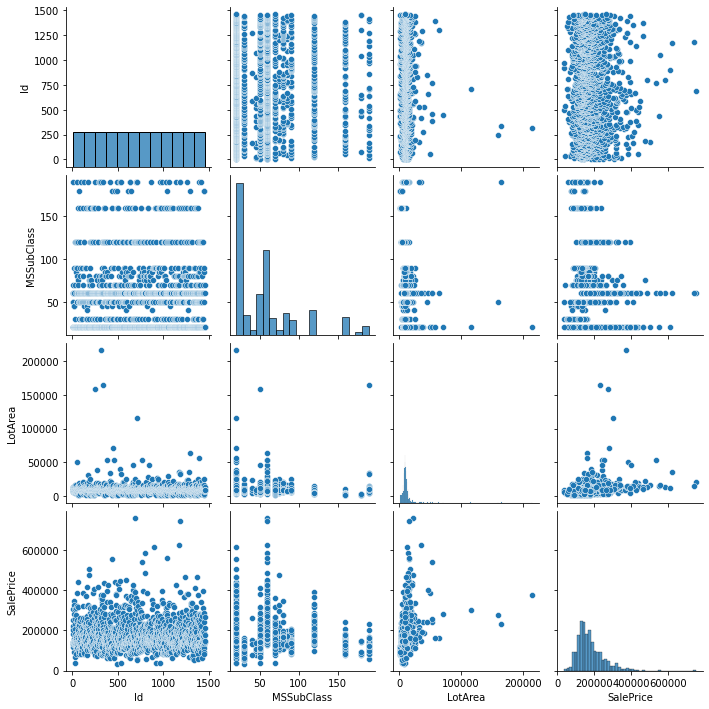

In [8]:
sns.pairplot(train)

# Determind the outliers

Multiplying the interquartile range (IQR) by 3 will give us a way to determine whether a certain value is a strong outlier. If we subtract 3 x IQR from the first quartile, any data values that are less than this number are considered strong outliers. Similarly, if we add 3 x IQR to the third quartile, any data values that are greater than this number are considered strong outliers.
With the help of the pair plot we can see that the SalePrice seem to have outlier data. 

### Which means the data over 466 075 must be deleted from the SalesPrice, however it will lower our accuracy; so we will ignore the data over 566 075 instead.

In [9]:
train = train[train.SalePrice < 566075]

# Check the reg plot

This method is used to plot data and a linear regression model fit. As you see this data is not a good candidate for linear regression and using the linear regression method woul probably give us an unaccurate prediction.

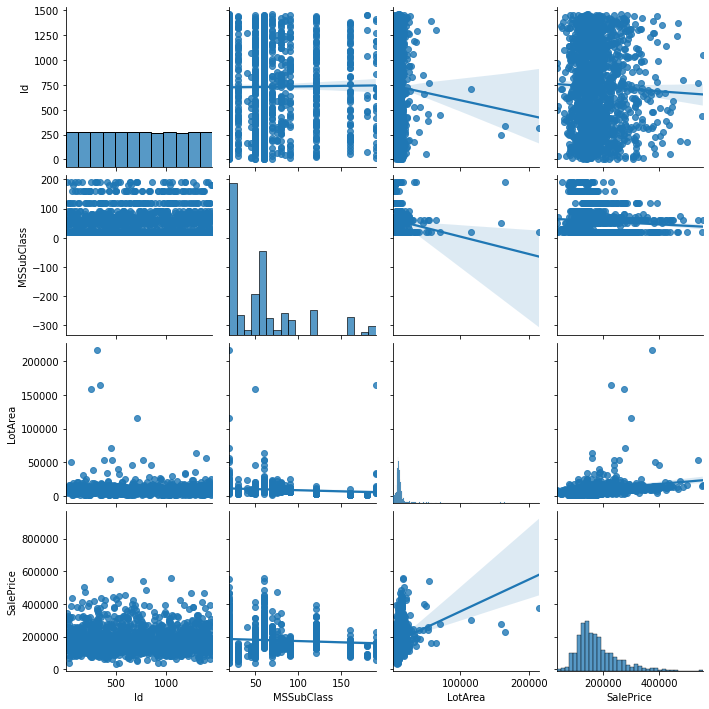

In [10]:
sns.pairplot(train,kind="reg")

## Now we will check the plot of the data with object data type. 

#### As you see, the 'Partial' SaleCondition seem to have the highest 'SalePrice' and  the 'Normal' SaleCondition have a higher 'SalePrice' than the 'Abnormal' one. 'AdjLand' holds the lowest SalePrice and the 'Alloca' and 'Family' are almost similar, however 'Alloca' has a wider range.

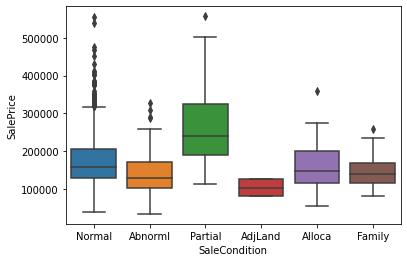

In [11]:
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=train)

#### The 'RL'  MSZoning seem to have a higher 'SalePrice' than the 'RM' MSZoning and the 'FV' have a higher 'SalePrice' than the 'RH' one. 'C (all)' seems to hold the lowest SalePrice.

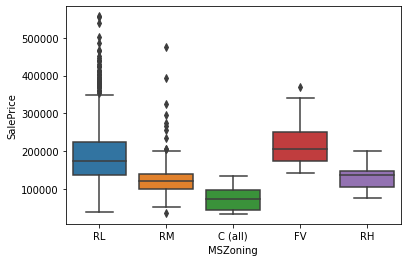

In [12]:
ax = sns.boxplot(x= 'MSZoning', y='SalePrice', data=train)

# Distribution of data

We can see that the SalePrice is more dense between the range 100 000 to 200 000 and most prices are in this range. 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

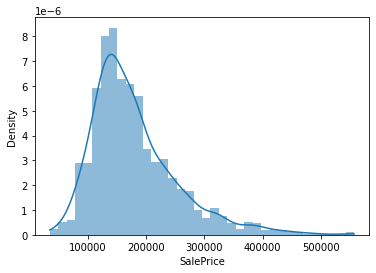

In [13]:
sns.histplot(train['SalePrice'], kde=True, stat="density", linewidth=0)

### With the help of the heatmap we can, once again, see that our data can't be modeled using the Linear regression, because the numbers calculated seem to be much less than 1.

<AxesSubplot:>

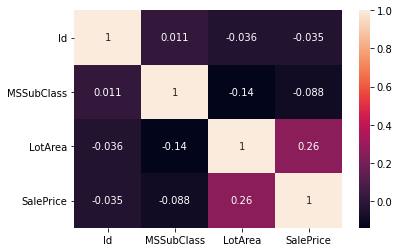

In [14]:
sns.heatmap(train.corr(), annot=True)

### To make sure that we deleted a column we will print the number of columns before and after deletation.

In [15]:
train.shape

(1455, 6)

### The 'Id' column hold no significance for the prediction and so it must get deleted

In [16]:
del train['Id']

In [17]:
train.shape

(1455, 5)

# Handle the object data types 

Categorical data must be converted to numbers. 
A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [18]:
one_hot = pd.get_dummies(train['MSZoning'])
train = train.drop('MSZoning',axis = 1)
train = train.join(one_hot)
second_hot = pd.get_dummies(train['SaleCondition'])
train = train.drop('SaleCondition',axis = 1)
train = train.join(second_hot)

# X and Y arrays of the train 

In [19]:
y_train = train['SalePrice']
del train['SalePrice']
x_train = train.values

# Read the test 

In [20]:
test = pd.read_csv("test1.csv")
test.head()

,Id,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
0,16,45,RM,6120,Normal,132000
1,23,20,RL,9742,Normal,230000
2,25,20,RL,8246,Normal,154000
3,30,30,RM,6324,Normal,68500
4,35,120,RL,7313,Normal,277500


# Determind the data type

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             191 non-null    int64 
 1   MSSubClass     191 non-null    int64 
 2   MSZoning       191 non-null    object
 3   LotArea        191 non-null    int64 
 4   SaleCondition  191 non-null    object
 5   SalePrice      191 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.1+ KB


### To make sure that we deleted a column we will print the number of columns before and after deletation.

In [22]:
test.shape

(191, 6)

### The 'Id' column hold no significance for the prediction and so it must get deleted

In [23]:
del test['Id']

In [24]:
test.shape

(191, 5)

# Handle the object data types 

Categorical data must be converted to numbers. 
A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [25]:
one_hot = pd.get_dummies(test['MSZoning'])
test = test.drop('MSZoning',axis = 1)
test = test.join(one_hot)
second_hot = pd.get_dummies(test['SaleCondition'])
test = test.drop('SaleCondition',axis = 1)
test = test.join(second_hot)

# X and Y arrays of the test

In [26]:
y_test = test['SalePrice']
del test['SalePrice']
x_test = test.values

# Linear Regression 

As mentioned above, the Linear Regression won't be a good model and here you can see the accuracy is not adequate.

In [27]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:
y_predict = model.predict(x_test)

In [29]:
df = pd.DataFrame({'data': y_test, 'prediction': y_predict})
df

,data,prediction
0,132000,125171.093163
1,230000,179817.375383
2,154000,177443.342006
3,68500,124871.213115
4,277500,180120.157467
...,...,...
186,394617,267628.193648
187,310000,192975.807191
188,121000,178823.931043
189,92000,97960.616746


In [30]:
MSE = metrics.mean_squared_error(y_test, y_predict)
MSE_SQRT = np.sqrt(MSE)
print("test accuracy:", MSE_SQRT)
y_predict = model.predict(x_train)
MSE = metrics.mean_squared_error(y_train, y_predict)
MSE_SQRT = np.sqrt(MSE)
print("train accuracy:", MSE_SQRT)

test accuracy: 66941.21823805536
train accuracy: 63256.70750635694


# Decision Tree

Since Linear Regression proved to be useless, we must seek nonlinear regressions. Decision trees is a non-linear classifier. It is generally used for classifying non-linearly separable data.
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.

In [31]:
model = DecisionTreeRegressor(random_state = 0) 
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [32]:
y_predict = model.predict(x_test)

In [33]:
prediction = pd.DataFrame(y_predict, columns=['SalePrice']).to_csv('prediction.csv')

In [34]:
MSE = metrics.mean_squared_error(y_test, y_predict)
MSE_SQRT = np.sqrt(MSE)
print("test accuracy:", MSE_SQRT)
y_predict = model.predict(x_train)
MSE = metrics.mean_squared_error(y_train, y_predict)
MSE_SQRT = np.sqrt(MSE)
print("train accuracy:", MSE_SQRT)

test accuracy: 9650.22344618717
train accuracy: 10042.93811149797


# Conclusions 

The data given was nonlinear and therefore the nonlinear regression model Decision Tree worked and successfully predicted the outcomes.

the accuracy is estimated as 9650.2 

# References

pbpython.com
<br> seaborn.pydata.org
<br> machinelearningmastery.com
<br> datascience.stackexchange.com
<br> wikipedia.org
<br> scikit-learn.org
<br> journaldev.com
<br> geeksforgeeks.org
<br> datacamp.com
<br> kaggle.com
<br> programmersought.com
